___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# let's set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [5]:
#`numpy` seed
#`tensorflow` random seed
#`python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
#loading our dataset using Keras
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
# print the number of images at both train and test dataset
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


##### **TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

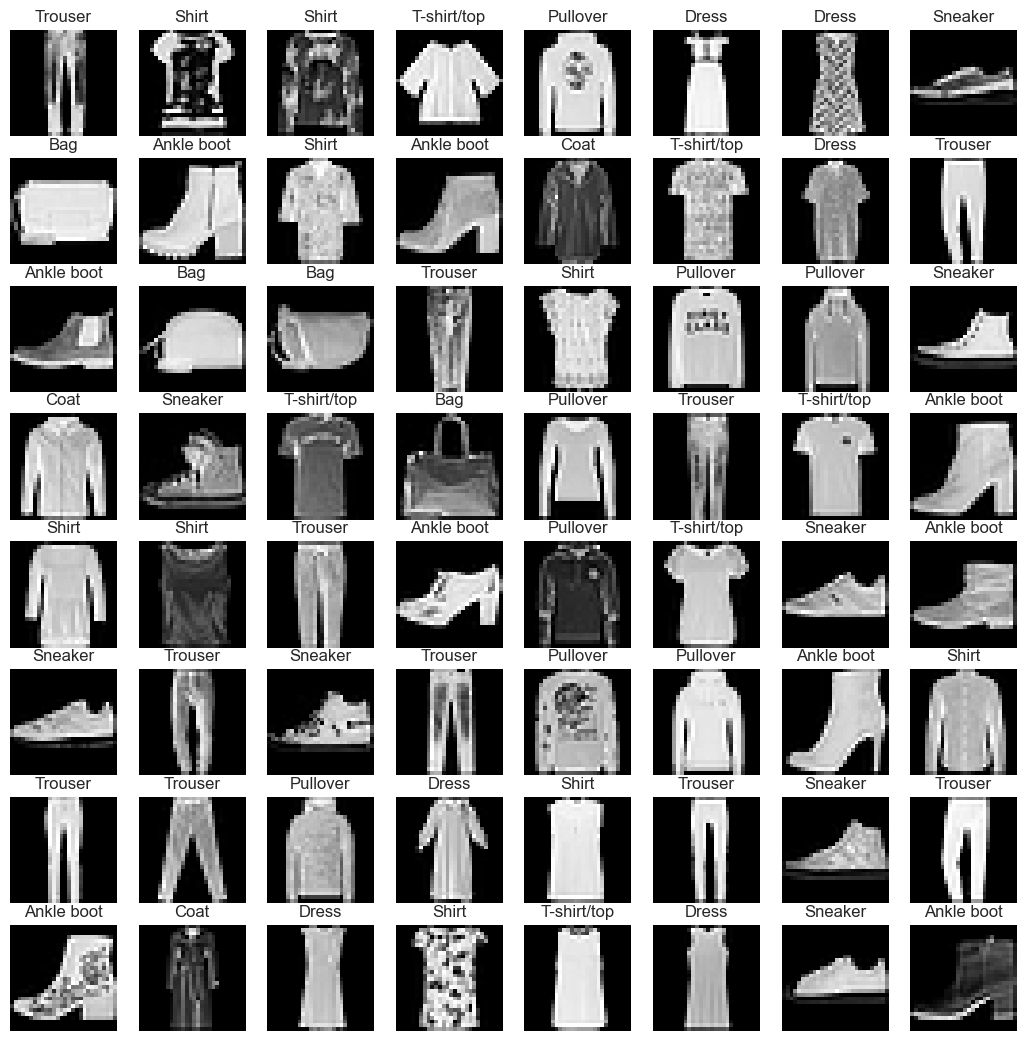

In [9]:
# let's visualize a random selection of images from the dataset 
#to get an idea of what the data looks like.

fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index], cmap="gray")
plt.show()

In [10]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
y_train.shape

(60000,)

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [15]:
#check the class of the value 0 --> class 9 which is should match the 'Ankle boot' class
y_train[0]

9

In [16]:
# here we ensure that class 9 mach 'Ankle boot' class
classes[y_train[0]]

'Ankle boot'

In [17]:
# in case that our class are of int type we can use this format
classes[int(y_train[0])]

'Ankle boot'

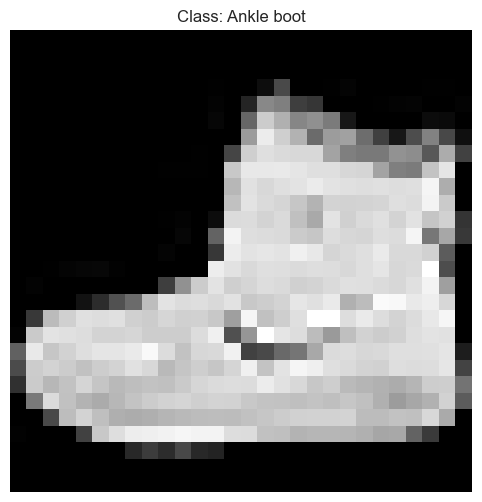

In [18]:
# to view an image from the data set

image_to_view = X_train[0]  # we can Change the index to view different images
# Display the image
plt.figure()
plt.imshow(image_to_view, cmap="gray")  # Using the image_to_view we define before and it of gray type not colored image
plt.title(f"Class: {classes[y_train[0]]}")  # Use the corresponding class label
plt.axis('off')  # Hide axis
plt.show()

<Axes: >

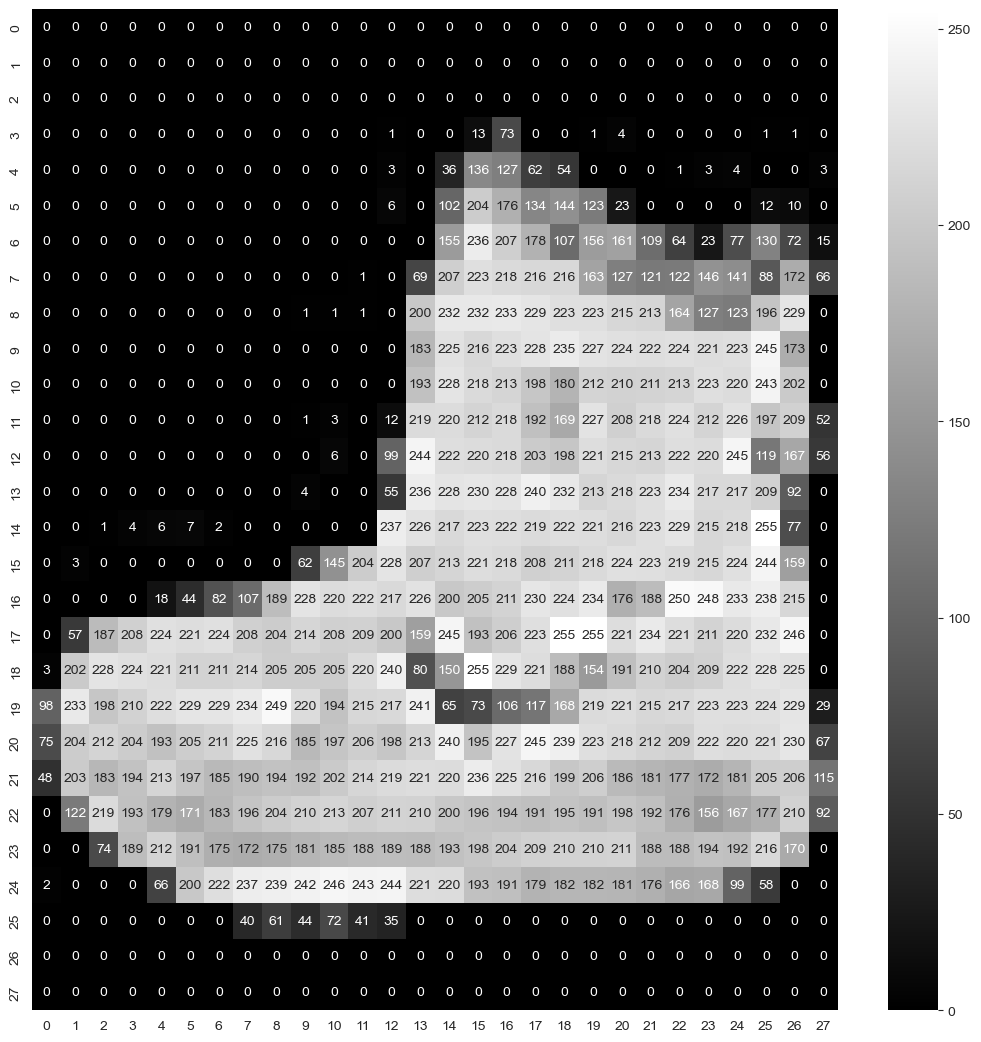

In [19]:
# show heatmap of an image
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[0], annot=True, fmt=".3g", cmap="gray")

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
#.min() before normalization
X_train[5].min()

0

In [21]:
#.max() before normalization
X_train[5].max()

255

In [22]:
# Let's Normalize image pixels
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [23]:
#.min() after normalization
X_train[0].min()

0.0

In [24]:
#.max() after normalization
X_train[0].max()

1.0

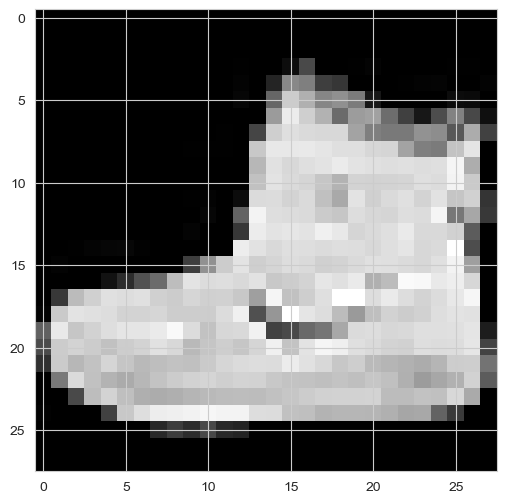

In [25]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
#check the initial shape of X arrayes
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
# expand the dimentions
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [28]:
# set the dimentions to the arrays
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [29]:
#check the shape of X arrayes after expanding
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
#convert the Y sets to categorical
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [32]:
# original y
y_train[0]

9

In [33]:
# categorical Y (encoded one)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Data Validation

In [34]:
#split our dataset to validation,train and test sets,with 20% test size and set  the random state to seed
from numpy.random import seed
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=SEED, shuffle=True)

In [35]:
# print our shapes after spliting 
print("X_train shape -> ", X_train.shape)
print("y_train shape -> ", Y_train.shape)
print("X_valid shape -> ", X_valid.shape)
print("y_valid shape -> ", Y_valid.shape)

X_train shape ->  (48000, 28, 28, 1)
y_train shape ->  (48000, 10)
X_valid shape ->  (12000, 28, 28, 1)
y_valid shape ->  (12000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
#lets create our model which having five different layers

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))  # padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# define the early stoping with val_loss monitor 
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [41]:
#fitting our model with 20 epochs
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/20
1500/1500 [==============================] - 81s 53ms/step - loss: 0.4027 - accuracy: 0.8582 - val_loss: 0.3150 - val_accuracy: 0.8871
Epoch 2/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2672 - accuracy: 0.9030 - val_loss: 0.3231 - val_accuracy: 0.8762
Epoch 3/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2225 - accuracy: 0.9175 - val_loss: 0.2610 - val_accuracy: 0.9047
Epoch 4/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.1905 - accuracy: 0.9319 - val_loss: 0.2709 - val_accuracy: 0.9071
Epoch 5/20
1500/1500 [==============================] - 79s 52ms/step - loss: 0.1659 - accuracy: 0.9399 - val_loss: 0.2648 - val_accuracy: 0.9093
Epoch 6/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1453 - accuracy: 0.9480 - val_loss: 0.2874 - val_accuracy: 0.9078
Epoch 7/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1274 - accuracy: 0.9538 - val_loss: 0.2842 -

**TASK 7: Plot values of metrics you used in your model.**

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
#check model history
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.403,0.858,0.315,0.887
1,0.267,0.903,0.323,0.876
2,0.223,0.917,0.261,0.905
3,0.190,0.932,0.271,0.907
4,0.166,0.940,0.265,0.909
5,0.145,0.948,0.287,0.908
6,0.127,0.954,0.284,0.908


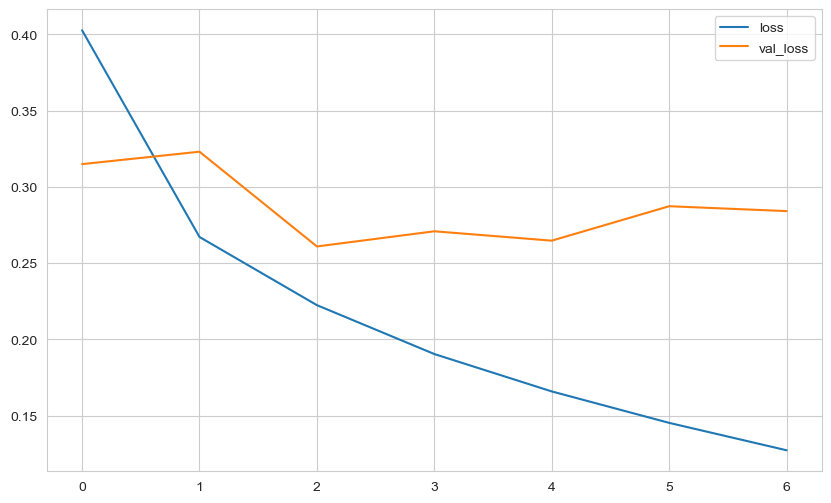

In [44]:
summary[["loss", "val_loss"]].plot()
plt.show()

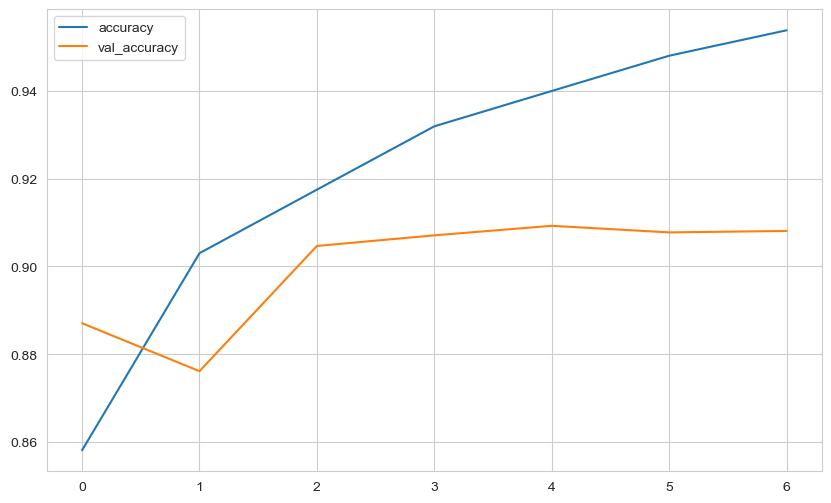

In [45]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [47]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2690 - accuracy: 0.9030


[0.2690066397190094, 0.902999997138977]

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2690066397190094
Test accuracy: 0.902999997138977


In [49]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 5s 14ms/step


array([[0.00000208, 0.00000008, 0.00001441, ..., 0.00853934, 0.00002289,
        0.9905043 ],
       [0.00026054, 0.        , 0.9997031 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000221, 0.99999774, 0.00000001, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00003183, 0.00000001, 0.0000485 , ..., 0.00002986, 0.9983412 ,
        0.00000031],
       [0.0000006 , 0.99998105, 0.00000001, ..., 0.        , 0.        ,
        0.0000002 ],
       [0.00405289, 0.00011443, 0.0349525 , ..., 0.14695016, 0.05655897,
        0.00898931]], dtype=float32)

In [50]:
pred_prob.shape

(10000, 10)

In [51]:
pred_prob[0]

array([0.00000208, 0.00000008, 0.00001441, 0.00000004, 0.00000777,
       0.00090015, 0.00000891, 0.00853934, 0.00002289, 0.9905043 ],
      dtype=float32)

In [52]:
np.argmax(pred_prob[0])

9

In [53]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [54]:
y_pred.shape

(10000,)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.81      0.84      1000
           3       0.92      0.91      0.92      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.67      0.81      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [56]:
print(confusion_matrix(y_test, y_pred))

[[799   0  27  10   4   0 156   0   4   0]
 [  1 982   0   8   3   0   5   0   1   0]
 [  8   1 814   7  79   0  91   0   0   0]
 [ 16   5  10 911  29   0  29   0   0   0]
 [  1   0  38  24 838   0  99   0   0   0]
 [  0   0   0   0   0 963   0  23   0  14]
 [ 66   0  49  24  46   0 805   0  10   0]
 [  0   0   0   0   0   4   0 977   1  18]
 [  3   0   1   4   0   2   8   2 980   0]
 [  0   0   0   0   0   2   2  35   0 961]]


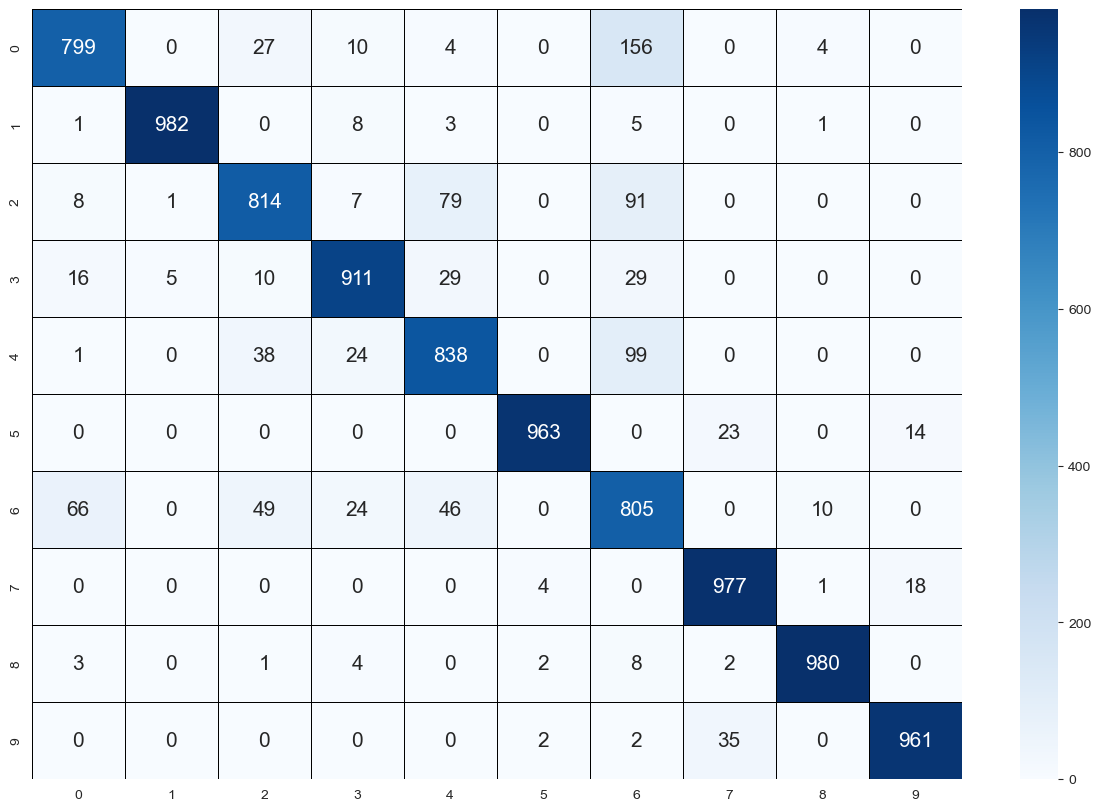

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [58]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [59]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

970

In [60]:
np.equal(y_test, y_pred).sum()

9030

## Prediction

In [61]:
#define prediction variable 
my_fasion = X_test[5]

In [62]:
my_fasion.shape

(28, 28, 1)

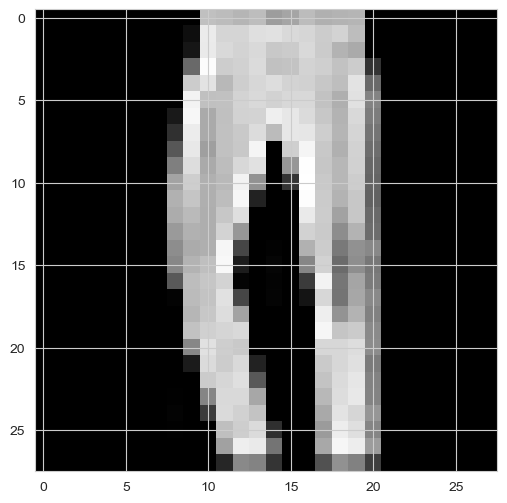

In [63]:
plt.imshow(my_fasion, cmap="gray")
plt.show()

In [64]:
np.expand_dims(my_fasion, 0).shape

(1, 28, 28, 1)

In [65]:
pred_prob = model.predict(np.expand_dims(my_fasion, 0))
pred_prob

1/1 [==============================] - 0s 79ms/step


array([[0.00010214, 0.9998747 , 0.00000134, 0.00000143, 0.00000108,
        0.0000015 , 0.00001757, 0.00000003, 0.00000005, 0.00000003]],
      dtype=float32)

In [66]:
# SHAPE --> (num_images, width, height, color_channels(1))
y_pred = np.argmax(pred_prob)
y_pred

1

In [67]:
# saving our model using H5 method
model.save("cnn-1.h5")

C:\Users\Taifa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Using the saved model

In [68]:
#loading our model from keras
model = tf.keras.models.load_model("cnn-1.h5")

In [69]:
#model prediction
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 [==============================] - 0s 257ms/step


In [70]:
# predictied class
np.argmax(pred)

1

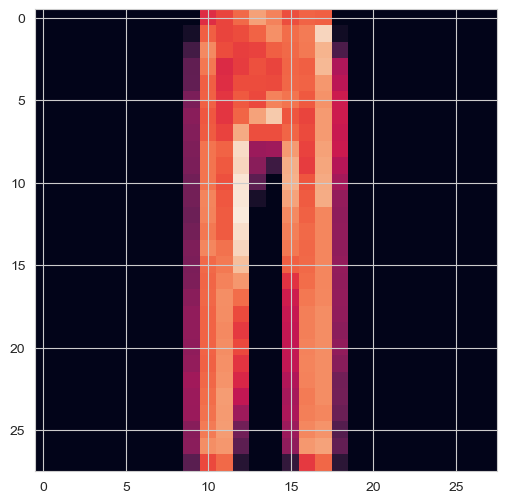

In [71]:
plt.imshow(X_test[24].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___